# Analisis Exploratorio de Datos

## 1.- Introducción muuuuy rapida a Data Frames

Puedes pensar en un **dataframe** como una variablesota donde puedes guardar tablas enteras (en vez de números o palabras sencillos).

Los dataframes no son nativos de Python, vienen de una libreria llamada **Pandas**

Lo primero que se necesita para trabajar con susodichos dataframes es... importar Pandas

In [2]:
import pandas as pd

Ok, ahora vamos a crear un Dataframe que almacene todos los datos que vienen en nuestro archivo de Excel CSV

In [3]:
datos_gym_df = pd.read_csv("datos_gimnasio.csv")

Veamos como se importo nuestra base de datos a df

Ok, veamos códigos útiles para analizar Dataframes. El primer método es **head**

In [4]:
datos_gym_df.head(20)

,codigo_user,Género,Peso,Cintura,Pulso,Lagartijas,Sentadillas,Saltos
0,usuario1,M,86.64,91.44,50,5,162,60
1,usuario2,M,85.73,93.98,52,2,110,60
2,usuario3,M,87.54,96.52,58,12,101,101
3,usuario4,F,73.48,88.90,62,12,105,37
4,usuario5,M,85.73,88.90,46,13,155,58
5,usuario6,F,82.55,91.44,56,4,101,42
6,usuario7,M,95.71,96.52,56,8,101,38
7,usuario8,F,75.75,86.36,60,6,125,40
8,usuario9,F,79.83,78.74,74,15,200,40
9,usuario10,F,69.85,83.82,56,17,251,250


Ahora conozcamos **shape**

In [5]:
datos_gym_df.shape

(20, 8)

Que al si quieremos ver una columna en especifico? ponemos el nombre de la columna entre corchetes

In [6]:
datos_gym_df["codigo_user"]

0      usuario1
1      usuario2
2      usuario3
3      usuario4
4      usuario5
5      usuario6
6      usuario7
7      usuario8
8      usuario9
9     usuario10
10    usuario11
11    usuario12
12    usuario13
13    usuario14
14    usuario15
15    usuario16
16    usuario17
17    usuario18
18    usuario19
19    usuario20
Name: codigo_user, dtype: object

Ok, ahora vamos viendo 2 columnas a la vez

In [7]:
datos_gym_df[["Peso","Pulso"]].head(5) #Importante el [[]] para hacer un select de varioas columnas

,Peso,Pulso
0,86.64,50
1,85.73,52
2,87.54,58
3,73.48,62
4,85.73,46


Por último, vamos pégandole a la estádistica descriptiva. El método **mean** te da los promedios que quieres saber del DF

In [8]:
datos_gym_df["Peso"].mean()

np.float64(81.01149999999998)

Y el método **Describe** te da un resumen de todo en el Dataframe

In [9]:
datos_gym_df.describe()


,Peso,Cintura,Pulso,Lagartijas,Sentadillas,Saltos
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,81.011500,89.916000,56.100000,9.450000,145.550000,70.30000
std,11.200197,8.133012,7.210373,5.286278,62.566575,51.27747
min,62.600000,78.740000,46.000000,1.000000,50.000000,25.00000
25%,72.912500,83.820000,51.500000,4.750000,101.000000,39.50000
50%,79.830000,88.900000,55.000000,11.500000,122.500000,54.00000
75%,86.865000,93.980000,60.500000,13.250000,210.000000,85.25000
max,112.040000,116.840000,74.000000,17.000000,251.000000,250.00000


## 2.- Primeros pasos - traer todo lo importante

Importa todas las librerías que vas a necesitar

- pandas como pd
- matplotlib.pyplot como plt
- seaborn como sns
- numpy como np
- scipy.stats traer norm
- sklearn.preprocessing traer standardscaler
- scipy traer stats
- warnings

y %matplotlib inline

In [10]:
import pandas as pd #Análisis y manipulación de datos en estructuras tipo DataFrame (tablas)
import matplotlib.pyplot as plt #Creación de gráficas y visualización básica
import seaborn as sns #Librería en matplotlib que ofrece gráficas más atractivas y estadísticas
import numpy as np #Cálculos nméricos, manejo de matrices y operaciones matemáticas avanzadas
from sklearn.preprocessing import StandardScaler #Escalado y normalización de datos antes de entranar modelos
from scipy import stats #Funciones estadística avanzadas (test de hipótesis, correlaciones, etc.)
import warnings

KeyboardInterrupt: 

Importa el csv de train.csv para poder tener los datos

La idea es identificar cuales columnas creemos que van a tener el mayor impacto sobre el precio de la vivienda. 

Al final veremos que las columnas con mayor impacto son:

Variables de Construcción
- CalidadTotal
- AñoConstruccion

Variables de Espacio
- AreaSotano
- AreaVivienda

## 3.- Analisis de Precio de Ventas

Lo primero es conocer a "PrecioVenta". Vamos viendo su **describe**

In [ ]:
train_df =pd.read_csv("train.csv")
train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Ahora vamos pidiendole una foto - hagamos una gráfica de **distplot**

Veremos que
- Se desvía de la distribucion normal
- Tiene Skew positivo (oblicuidad)
- Muestra Peakedness (kurtosis??)

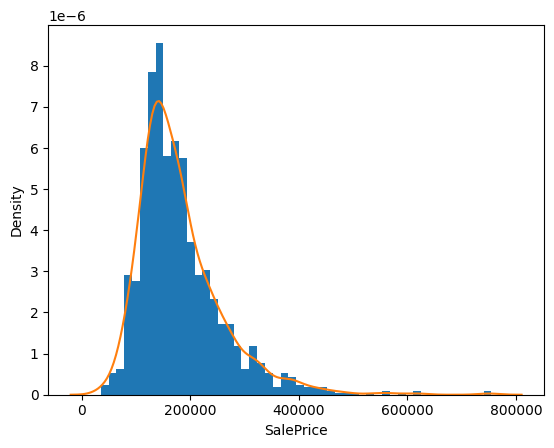

In [ ]:
plt.hist(train_df["SalePrice"],density = True, bins = 50)
sns.kdeplot(train_df["SalePrice"])
plt.show()

Podemos conocer el skewness y la kurtosis de la gráfica usando los métodos **skew** y **kurt**

In [ ]:
train_df["SalePrice"].skew() #Asimetría
#Skew >< 0: distribución simétirca (parecida a una normal)
#Skew > 0: distribución asimetría positiva (cola larga a la derecha)
#Skew < 0: distribución asimetría negativa (cola larga a la izquierda)

np.float64(1.8828757597682129)

In [ ]:
train_df["SalePrice"].kurt() #Anchura (como de gorda)
#Kurt >< 0: distribución simétirca (mecúrtica)
#Kurt > 0: distribución asimetría positiva (leptocúrtica)
#Kurt < 0: distribución asimetría negativa (platicúrtica)

np.float64(6.536281860064529)

Vamos viendo que sucede con las amigas de "PrecioVenta" - dibujemos un ScatterPlot de PrecioVenta vs AreaVivienda. Nota como vamos a reducir el dataframe a solo 2 columnas para no tener que usar todo

Primero declara una variable var que contenga el area vivible

In [ ]:
var = "GrLivArea" # Nombre columna

Luego vamos a usar pd.concat para crear una tabla de solo 2 columnas con area vivible (var) y Precio de venta que se llame data

In [ ]:
data = pd.concat([train_df["SalePrice"], train_df [var]],axis=1)

In [ ]:
data

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
...,...,...
1455,175000,1647
1456,210000,2073
1457,266500,2340
1458,142125,1078


y ahora vamos a terminar con un data.plot.scatter para crear una grafica de scatterplot. 

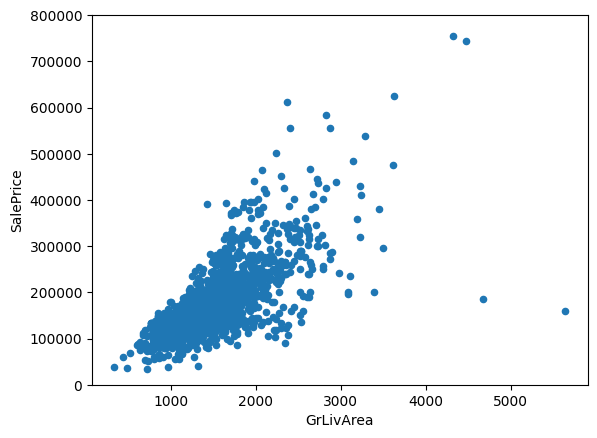

In [ ]:
data.plot.scatter(x=var, y ="SalePrice", ylim=(0,800000))
plt.show()

Ahora que pasa con "PrecioVenta" y "AreaSotano"? Son amigas pero su relación no es lineal. Sin mencionar que a veces, el AreaSotano se va en su onda y evita el PrecioVenta

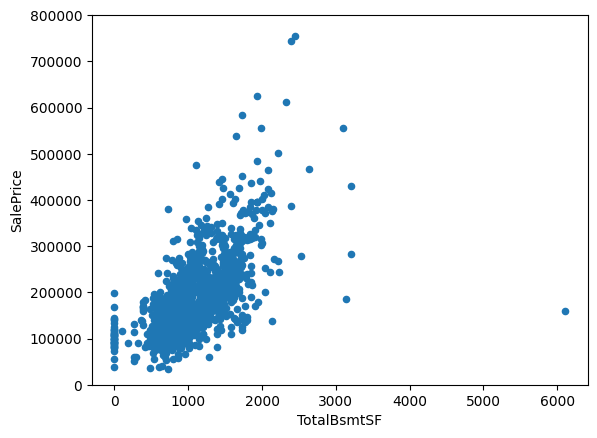

In [ ]:
var = "TotalBsmtSF"
data = pd.concat([train_df["SalePrice"], train_df [var]],axis=1)
data.plot.scatter(x=var, y ="SalePrice", ylim=(0,800000))
plt.show()

#### Relaciones categóricas

Vamos ahor a armar una gráfica de boxplot para verificar el efecto de la Calidad sobre el precio de ventas. 

Comenzamos igual, declara una variable var = "CalidadTotal"

Y una data donde concatenes el precio de ventas con var

In [ ]:
var = "OverallQual"

In [ ]:
data = pd.concat([train_df["SalePrice"], train_df [var]],axis=1)

In [ ]:
data.head(5)

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8


Ahora viene lo dificl, en dos variables f y ax, vas a guardar el resultado de un plt.subplots - donde se define la nueva figura donde existirá la gráfica que se va a crear. F y ax es la figura y los ejes que devuelve la instruccion

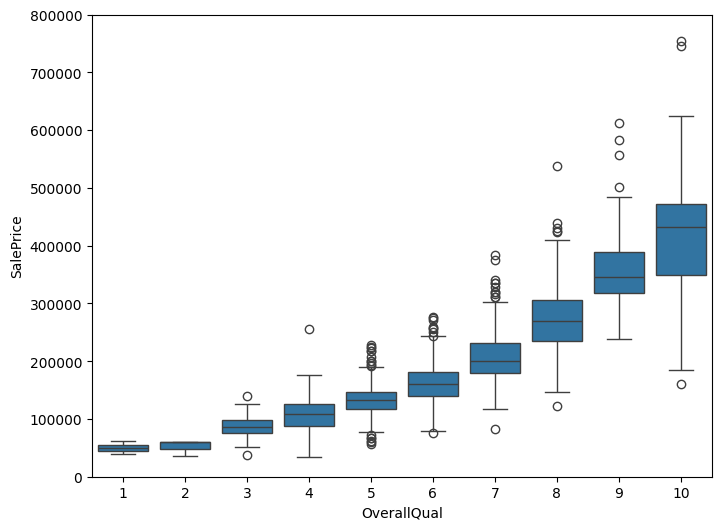

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x=var,y = "SalePrice", data = data)
fig.axis(ymin=0,ymax=800000)
plt.show()

por ultimo, definimos fig como una variable donde haremos un sns.boxplot (para guardar la grafica)

y definiremos el eje fig.axis de 0 a 8000000

Hagamos lo exacto mismo pero con Precio de Venta vs Año Construida

In [ ]:
var = "YearBuilt"

In [ ]:
data = pd.concat([train_df["SalePrice"], train_df [var]],axis=1)

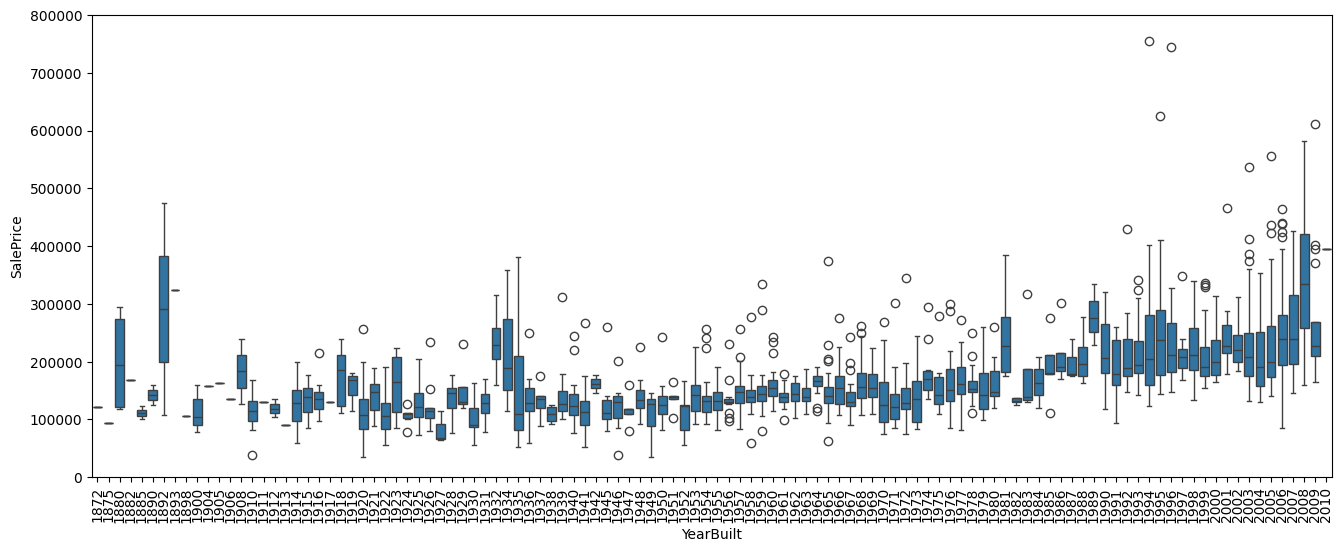

In [ ]:
f, ax = plt.subplots(figsize = (16,6))
fig = sns.boxplot(x=var,y = "SalePrice", data = data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90)
plt.show()

#### En resumen

¿Que es lo que observas de las variables númericas?

¿Que es lo que observas de las variables catégoricas

## 4.- Confirmando nuestra intuición

Hasta ahora decidimos a puro pulso que estas 4 eran las variables importantes, vamos confirmando con números si es verdad o no

### 4.1.- Matriz de Correlación

Lo primero es armar una matriz de correlación (mapa de calor) para ver cuales son las variables más correlacionadas

Vamos declarando una variable corrmat = df_train.corr() con todas las correlaciones entre variables

In [ ]:
corrmat= train_df.corr(numeric_only = [False])

Luego unas f,ax para declarar un plt.subplots

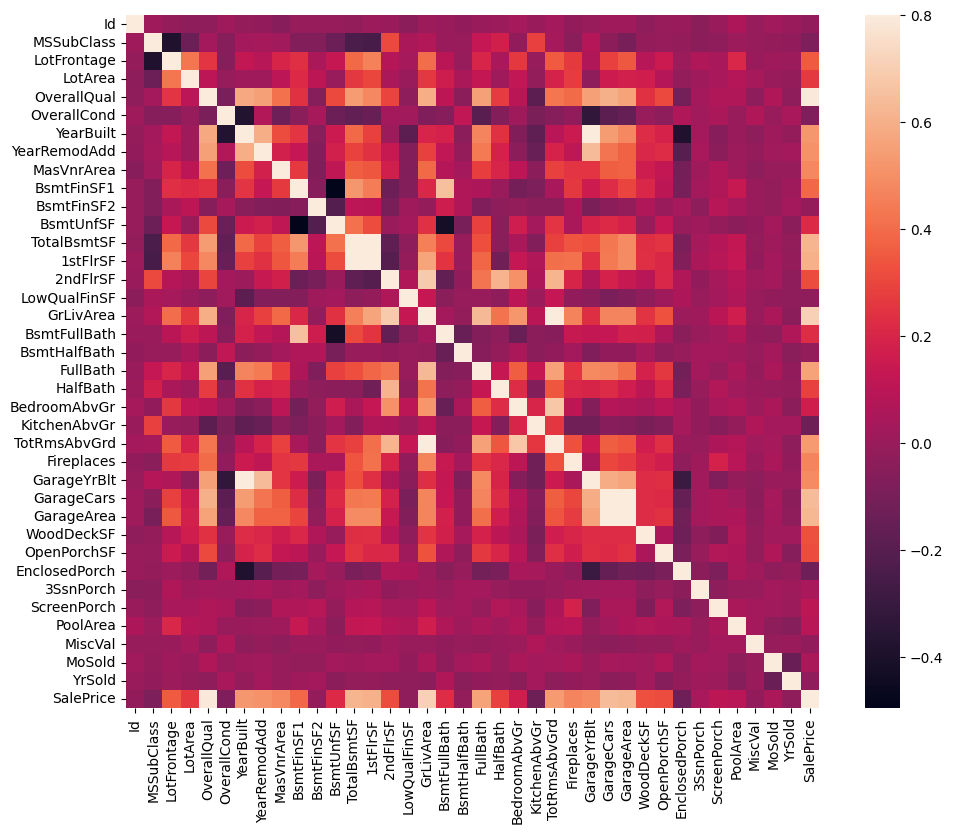

In [ ]:
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

### 4.2.- Matriz de Correlación con Números

Ok, vamos haciendo lo mismo pero ahora con números - y vamos viendo quien se correlaciona más - sin llegar al punto que las 2 variables sean basicamente lo mismo claro

Comenzamos declarando k=10

In [ ]:
k=10

Luego cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

In [ ]:
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

In [ ]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

A continuación vamos a cm = np.corrcoef(df_train[cols].values.T)

In [ ]:
cm = np.corrcoef(train_df[cols].values.T)

In [ ]:
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

Seguimos con sns.set(font_scale=1.25)

In [ ]:
sns.set(font_scale=1.25)

Armarmos el heatmap con hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

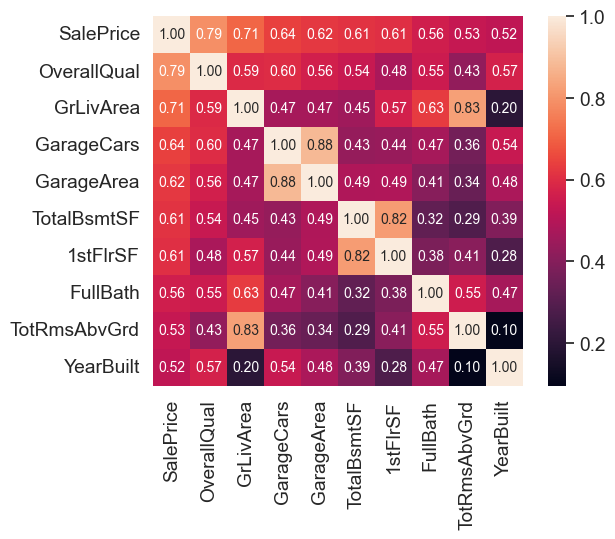

In [ ]:
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

Podemos ver que:
- Calidad, AreaVivienda y area Sotano estan muy fuertemente correlacionadas con PrecioVenta
- Las variables de garage están super correlacionadas
- Sotano y 1er piso son basicamente hermanos gemelos
- Y AñoConstruccion esta ligeramente correlacionada con PrecioVenta, parece que en un futuro habra que hacer un analisis de serie de tiempo más serio.

### 4.3.- Scatter Plots entre Sale Price y variables Correlacionados

Por utlimo, hagamos scatterplots usando seabron de todas las posibles relaciones que podríamos tener en nuestro dataset - entre las variables que nos importan claro.

Comenzamos declarando sns.set()

In [ ]:
sns.set()

Luego cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

In [ ]:
train_df =pd.read_csv("train.csv",usecols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'])

Seguimos con sns.pairplot(df_train)

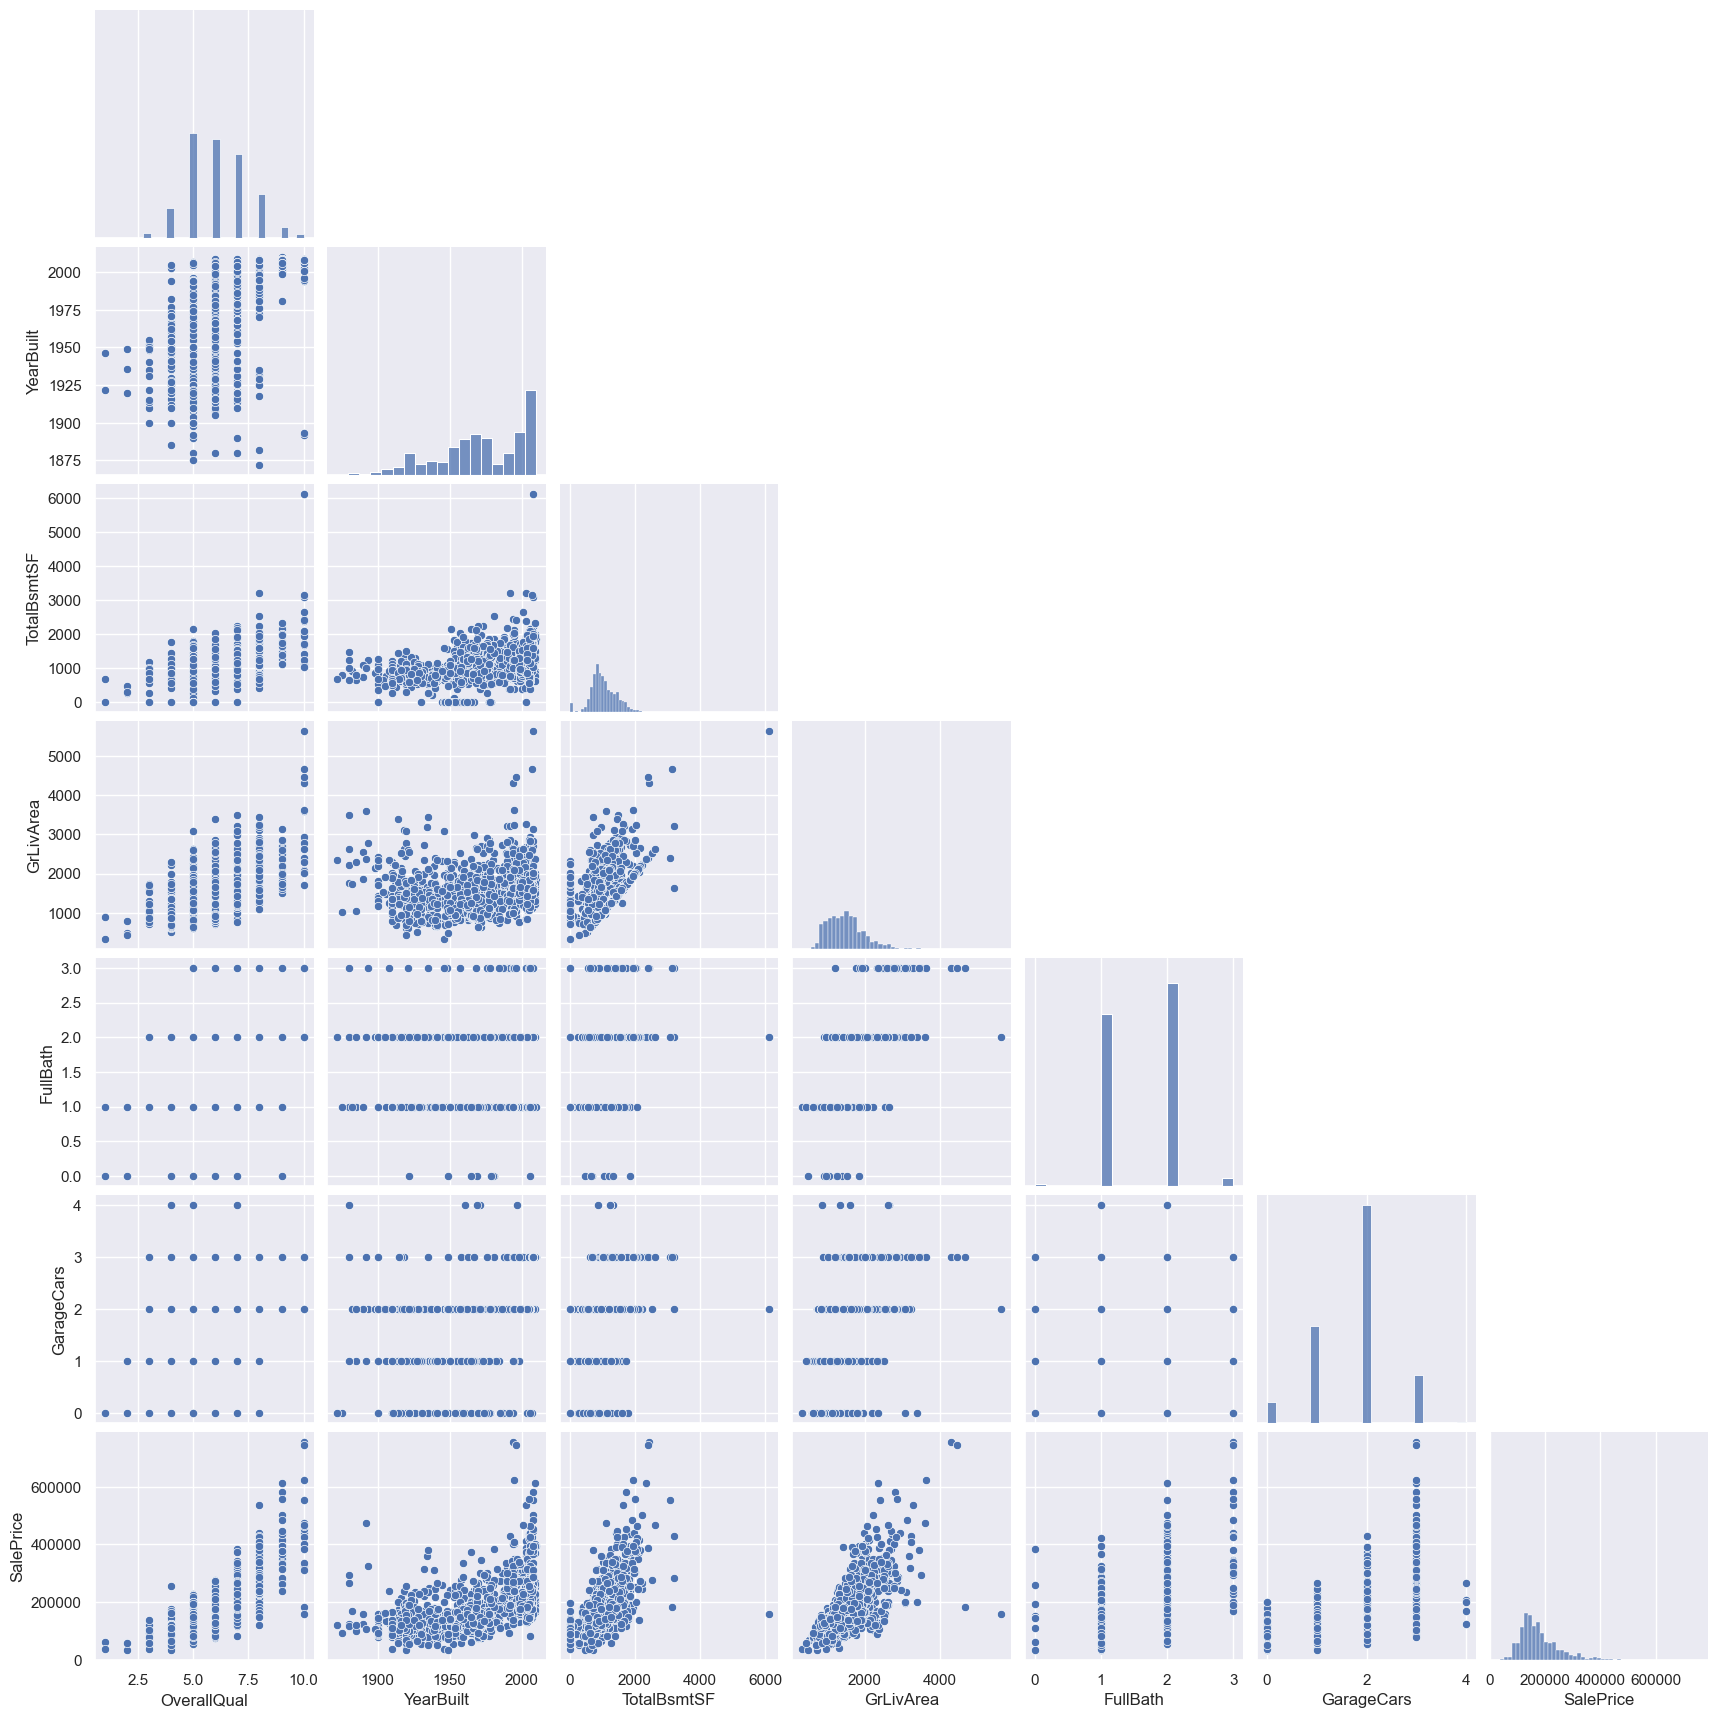

In [ ]:
sns.pairplot(train_df,height=2.5,corner=True,diag_kind="hist")
plt.show()

Y terminamos con plt.show();

In [ ]:
plt.show()

NameError: name 'plt' is not defined